In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sb
%matplotlib inline

In [ ]:
dataset = pd.read_excel('Data file 1991-2021 (2).xlsx')
dataset.columns = ['Export', 'Import', 'Seafood','Poultry', 'Cattle', 'World Oil Price','Unemployment','World Gold Price','GDP']
dataset

,Export,Import,Seafood,Poultry,Cattle,World Oil Price,Unemployment,World Gold Price,GDP
0,2.087,2.338,168.1,109.0,18188.5,19.37,2.092,359.4333,9.613
1,2.580,2.540,172.9,124.5,19980.0,19.02,1.912,343.2917,9.866
2,2.985,3.923,188.1,133.4,21167.0,16.84,1.969,363.9500,13.180
3,4.054,5.825,344.1,137.8,22031.8,15.89,1.931,384.6750,16.286
4,5.448,8.155,389.1,142.1,22908.1,17.18,1.899,384.3167,20.736
5,7.255,11.143,423.0,151.4,23675.6,20.42,1.930,386.4583,24.657
6,9.185,11.592,414.6,160.6,24484.3,19.17,2.870,329.5833,26.843
7,9.360,11.499,425.0,166.4,25071.1,13.06,2.290,294.5750,27.209
8,11.541,11.742,480.8,179.3,25905.1,18.07,2.330,279.8667,28.683
9,14.482,15.636,590.0,196.1,27218.9,28.23,2.260,277.0833,31.172


In [ ]:
dataset = dataset.dropna(axis = 1) #remove NANs

**Step 1: Standardize the Dataset**

In [ ]:
x = dataset.values #convert the data into a numpy array
X_std = StandardScaler().fit_transform(x) #standardize the dataset

**Step 2: Create a Covariance Matrix**

In [ ]:
covar_matrix = np.cov(X_std.T)
covar_matrix

array([[ 1.03333333,  1.03125425,  0.97440942,  0.99830992,  0.51885924,
         0.49422959, -0.90136027,  0.90101685,  1.01703389],
       [ 1.03125425,  1.03333333,  0.98736596,  1.00217817,  0.55539473,
         0.53047158, -0.90263846,  0.91340788,  1.01881501],
       [ 0.97440942,  0.98736596,  1.03333333,  1.00240622,  0.73798371,
         0.71945916, -0.86440092,  0.97500026,  1.00814889],
       [ 0.99830992,  1.00217817,  1.00240622,  1.03333333,  0.66371186,
         0.58342371, -0.85590355,  0.92587469,  1.00911575],
       [ 0.51885924,  0.55539473,  0.73798371,  0.66371186,  1.03333333,
         0.75936136, -0.50913007,  0.62900184,  0.60581824],
       [ 0.49422959,  0.53047158,  0.71945916,  0.58342371,  0.75936136,
         1.03333333, -0.47759098,  0.78141445,  0.59383379],
       [-0.90136027, -0.90263846, -0.86440092, -0.85590355, -0.50913007,
        -0.47759098,  1.03333333, -0.84691093, -0.90592741],
       [ 0.90101685,  0.91340788,  0.97500026,  0.92587469,  0

**Step 3: Calculate Eigenvalues and Scree Plot**

In [ ]:
eig_vals, eig_vecs = np.linalg.eig(covar_matrix) #calculating eigenvalue and corresponding eigenvector
# sort eigenvalue in descending order
idx = eig_vals.argsort()[::-1]
eig_vals = eig_vals[idx]
eig_vecs = eig_vecs[:,idx]
eig_vals, eig_vecs  #first two principal components have eigenvalues greater than 1

(array([7.62038995e+00, 1.03044602e+00, 3.39603405e-01, 2.17732248e-01,
        5.63388569e-02, 1.91121354e-02, 9.85778611e-03, 5.93312788e-03,
        5.86464667e-04]),
 array([[-3.51291203e-01, -2.76832707e-01, -4.00644825e-02,
          1.71497644e-01,  3.12602176e-01, -1.13208571e-01,
          2.61080813e-01,  2.15453249e-01, -7.37442841e-01],
        [-3.55237414e-01, -2.32654036e-01, -4.59320500e-02,
          1.59855404e-01,  3.37557257e-01, -1.93216276e-01,
          4.78532454e-01,  1.08861108e-02,  6.41580648e-01],
        [-3.65810372e-01,  3.27940060e-02, -3.94366542e-02,
          1.57373873e-01, -5.39074696e-02, -3.09215781e-01,
         -2.45223513e-01, -8.18534620e-01, -1.00655996e-01],
        [-3.57974364e-01, -1.11059139e-01, -1.81936985e-01,
          2.86561609e-01, -1.56754900e-01,  8.41523003e-01,
         -5.05035906e-02, -7.94493966e-02,  5.20165202e-02],
        [-2.55707346e-01,  5.94031299e-01, -7.00640534e-01,
         -1.24957691e-01, -1.08740245e-01, -1.

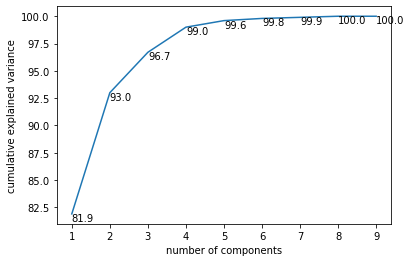

In [ ]:
pca = PCA().fit(X_std)
cumulative_variance=np.cumsum(pca.explained_variance_ratio_*100)
x = [1,2,3,4,5,6,7,8,9]
y = np.round(cumulative_variance, decimals=1)
plt.plot(x,y)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
for a,b in zip(x, y):
    plt.text(a, b-0.65, str(b))
plt.show() #Scree plot

Since the first two principal components have the eigenvalues greater than 1 and they capture cumulatively 93% of variance within our data set, we choose principal components 1 and 2



**Step 4: Loading**

In [ ]:
def Top3_loading(c):
  loading_scores=pd.Series(pca.components_[c])
  sorted_loading_scores=loading_scores.abs().sort_values(ascending=False)
  top_3=sorted_loading_scores[0:3].index.values
  print(loading_scores[top_3])
# Calculate top 3 most loading variables in each component
Top3_loading(0)
Top3_loading(1)
Top3_loading(2)
Top3_loading(3)
Top3_loading(4)
Top3_loading(5)
Top3_loading(6)
Top3_loading(7)
Top3_loading(8)

2    0.365810
8    0.361683
3    0.357974
dtype: float64
5   -0.647580
4   -0.594031
0    0.276833
dtype: float64
4   -0.700641
5    0.540291
7    0.422607
dtype: float64
6   -0.897956
3   -0.286562
0   -0.171498
dtype: float64
7    0.744955
5   -0.434967
1   -0.337557
dtype: float64
3   -0.841523
2    0.309216
8    0.228276
dtype: float64
8   -0.729012
1    0.478532
7    0.298485
dtype: float64
2    0.818535
8   -0.462622
0   -0.215453
dtype: float64
0    0.737443
1   -0.641581
8   -0.175302
dtype: float64


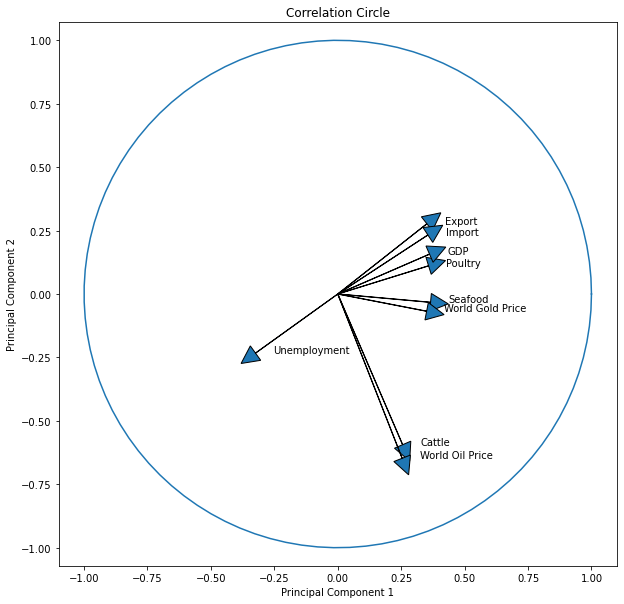

In [ ]:
# Plot correlation circle
(fig, ax) = plt.subplots(figsize=(10, 10))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07)

    plt.text(pca.components_[0, i] + 0.07,
             pca.components_[1, i] + 0.0005,
             dataset.columns.values[i])

an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
ax.set_title('Correlation Circle')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
plt.show()